## Integrating Consecutive Reactions

Note: I stole most of this math from a my tutorial on integration. (09-T21-Integrating_Simple_Rate_Equations.pdf)

### The System of Reactions

For reactions of the form...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

...we can identify the rate of formation of each species by writing their rate laws as differential equations...

$$\begin{align}
\dfrac{d \left[ \text{A} \right]_t}{dt} &= -k_1 \left[ \text{A} \right]_t \\
\dfrac{d \left[ \text{I} \right]_t}{dt} &= k_1 \left[ \text{A} \right]_t - k_2 \left[ \text{I} \right]_t \\
\dfrac{d \left[ \text{P} \right]_t}{dt} &= k_1 \left[ \text{A} \right]_t + k_2 \left[ \text{I} \right]_t 
\end{align}$$

### Integrating for [A]

We have already done this above. the integrated rate law for $[A]_t$ is known...

$$\left[ \text{A} \right]_t = \left[ \text{A} \right]_0 e^{-k_1 t}$$

### Integrating for [I]

Substitute the integrated rate law for $[A]$ into the rate law for $[I]$ above...

$$\dfrac{d \left[ \text{I} \right]_t}{dt} = k_1 \left[ \text{A} \right]_0 e^{-k_1 t} - k_2 \left[ \text{I} \right]_t$$

As before we can set a value, $x$, that describes the progress of the reaction. We can state that $[I]_t = x$ and set up a differential equation like so...

$$ \frac{d}{d t}{x} = A_{0} k_{1} e^{- k_{1} t} - k_{2} x$$

My integration skills are very rusty. Do I use integration by parts or integration by substitution? rather than relearn calculus I truyne to the symbolic math tools of sympy. Consider the code below.

In [47]:
import sympy as sym

t = sym.symbols('t')     
k1 = sym.symbols('k1')  
k2 = sym.symbols('k2')  
At = sym.symbols('A_t') 
A0 = sym.symbols('A_0') 
It = sym.symbols('I_t') 
Pt = sym.symbols('P_t')  

xt = sym.Function('x_t')    # create x as a 'function', not a variable

lhs = sym.Derivative(It, t) # Using Derivative function to get differential of A(t) w.r.t. t
                            # could not used At.diff(t) because At is not a function 
rhs = k1*(A0)*sym.exp(-k1*t)-k2*It

diffeq = sym.Eq(lhs, rhs)   # create a sympy differential equation
print("The initial differential equation is...")
display(diffeq)             

diffeq = diffeq.subs({It: xt(t)})    # substitute I for x

print("After substituting the differential equation is...")
display(diffeq) 


print("The integrated equation starting at x=0 when t=0 is...")
result = sym.dsolve(diffeq, ics={xt(0): 0})     # Solve the differential equation. 
                                            # Initial condition is x(t) = 0 when t = 0
display(result)

print("Collecting some terms and substiting for x gives...")
simplified = sym.collect(result.rhs,(A0*k1/(k1-k2)))
I = sym.Eq(result.lhs,simplified)
I = I.subs({xt(t): It})              # substitute x for I
display(I)


The initial differential equation is...


Eq(Derivative(I_t, t), A_0*k1*exp(-k1*t) - I_t*k2)

After substituting the differential equation is...


Eq(Derivative(x_t(t), t), A_0*k1*exp(-k1*t) - k2*x_t(t))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), A_0*k1*exp(-k2*t)/(k1 - k2) - A_0*k1*exp(-k1*t)/(k1 - k2))

Eq(I_t, A_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

Now we have the term...

$$ x =A_{0} \frac{ k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)$$

...and, knowing that $[I]_t = x$, we can now say...

$$ \left[I \right]_t =A_{0} \frac{ k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)$$

### Integrating for [P]

We dont have to integrate for this last term. We can say that the total amount of material is equal to $[A]_0$. Recall the reaction scheme...

For reactions of the form...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

... and write a mass balance equation...

$$\begin{align}
2 [A]_0 &= 2*[A]_t+[I]_t+[P]_t \\
[P]_t &= 2 [A]_0 - \left(2*[A]_t+[I]_t\right) 
\end{align}$$


For the fun of it, lets let sympy do all the work in the code below...

In [48]:
Pt = sym.symbols('P_t')   # create Pt as a 'symbol'

A = sym.Eq(At,A0*sym.exp(-k1*t))
display(A,I)

rhs = 2*A0 - 2*A.rhs - I.rhs
display(rhs)

rhs = sym.collect(rhs,A0)
display(rhs)

P = sym.Eq(Pt,rhs)
display(P)


Eq(A_t, A_0*exp(-k1*t))

Eq(I_t, A_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

-A_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2*A_0 - 2*A_0*exp(-k1*t)

A_0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t))

Eq(P_t, A_0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t)))

So the amount of product over time is expressed as...

$$P_{t} = A_{0} \left( 2\left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)$$

In [49]:
display(A,I,P)

Eq(A_t, A_0*exp(-k1*t))

Eq(I_t, A_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

Eq(P_t, A_0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t)))

exp(-0.002*t)

-1.11172873818788*exp(-0.002*t) + 1.11172873818788*exp(-0.000201*t)

2 - 0.888271261812118*exp(-0.002*t) - 1.11172873818788*exp(-0.000201*t)

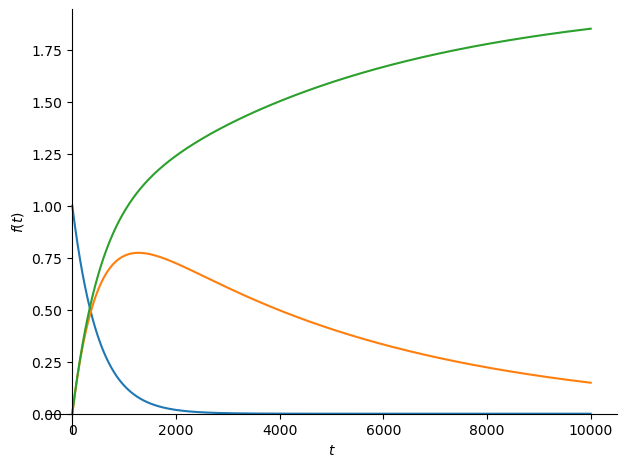

In [50]:
import matplotlib.pyplot as plt

k1_rate = 2e-3
k2_rate = 2.01e-4
A0_conc = 1

t_range = [t,0,10000]

eq1 = A.rhs
eq1 = eq1.subs({k1:k1_rate, A0:A0_conc})

eq2 = I.rhs
eq2 = eq2.subs({k1:k1_rate, k2:k2_rate, A0:A0_conc})

eq3 = P.rhs
eq3 = eq3.subs({k1:k1_rate, k2:k2_rate, A0:A0_conc})

display(eq1,eq2,eq3)


plt.rcdefaults()

p = sym.plot(eq1,eq2,eq3,t_range, show=False)
p.show()

## Absorbance

the authors followed the reaction by absorbance. The amount of $A$ is decreasing and the amount of $C$ is increasing. If the final aborbance is different than the initial (e.q. A and C have different extinction coefficients) then we should be able to get kinetic parameters from an equation that describes the change in absorbance vs. time. 

The total $Abs$ will be $Abs_A(t) + Abs_I(t) + Abs_P(t)$

And we can say that...

$$Abs(t) = \epsilon_A\cdot A_t + \epsilon_I\cdot I_t + \epsilon_P\cdot P_t$$

$$Abs(t) = \epsilon_A\cdot A_{0} e^{- k t} +
 \epsilon_I\cdot A_{0} \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right) + 
 \epsilon_P\cdot A_{0} \left( 2\left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)$$


When we begin, the initial absorbance is due to $[A]_0$ and so we can say that $Abs_0 = \epsilon_A\cdot A_{0}$ and so if...

$$A_{0} = \frac{Abs_0}{\epsilon_A}$$

...then we can say that

$$Abs(t) = \epsilon_A\cdot \frac{Abs_0}{\epsilon_A} e^{- k t} +
 \epsilon_I\cdot \frac{Abs_0}{\epsilon_A} \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right) + 
 \epsilon_P\cdot \frac{Abs_0}{\epsilon_A} \left( 2\left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)$$


and after we simplify we get the same equation as the authors present in their paper (eq. 2). It is a useful exercise to check the math in any paper. Printing errors are common, especially in typeset equations and figures that are often reinterpretted in the printing process (especially a risk in older papers.)

$$Abs(t) = {Abs_0} e^{- k t} +
 \frac{\epsilon_I}{\epsilon_A}Abs_0 \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right) + 
 \frac{\epsilon_P}{\epsilon_A}  Abs_0 \left( 2\left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)$$

Now let us do all of that with *Python*


In [51]:
display(A,I,P)

At_ = A.rhs      # expressions for concentrations
It_ = I.rhs
Pt_ = P.rhs

e_A = sym.symbols(r'\epsilon_A')   # extinction coefficients
e_I = sym.symbols(r'\epsilon_I') 
e_P = sym.symbols(r'\epsilon_P') 

Abs_A = sym.symbols(r'Abs_A')   # variables for absotrbances
Abs_I = sym.symbols(r'Abs_I')
Abs_P = sym.symbols(r'Abs_P')
Abs_0 = sym.symbols('Abs_0')

Total = e_A*At_ + e_I*It_ + e_P*Pt_           # total absorbance
Total = Total.subs(A0, Abs_0/e_A)
display(Total)

display(Total.subs(e_I/e_A, At))


Eq(A_t, A_0*exp(-k1*t))

Eq(I_t, A_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

Eq(P_t, A_0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t)))

Abs_0*exp(-k1*t) + Abs_0*\epsilon_I*k1*(exp(-k2*t) - exp(-k1*t))/(\epsilon_A*(k1 - k2)) + Abs_0*\epsilon_P*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t))/\epsilon_A

A_t*Abs_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + Abs_0*exp(-k1*t) + Abs_0*\epsilon_P*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t))/\epsilon_A

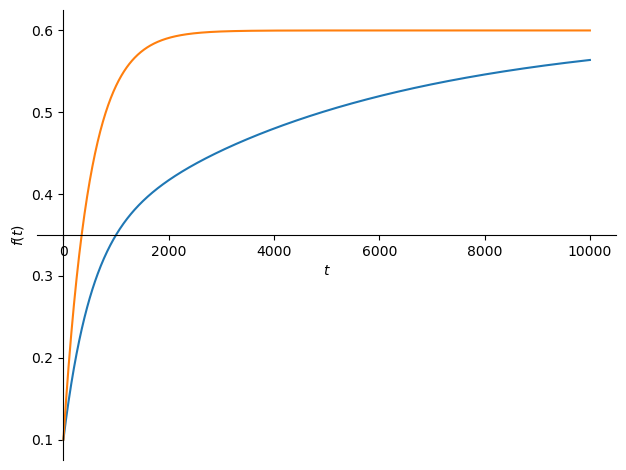

In [52]:
k1_rate = 2e-3
k2_rate = 2.0e-4
Abs0_ = 0.1

t_range = [t,0,10000]

eq = Total
eq = eq.subs({k1:k1_rate, 
                k2:k2_rate, 
                Abs_0:Abs0_,
                e_A: 1,
                e_I: 0.6,
                e_P: 3})


#display(eq)


plt.rcdefaults()

p = sym.plot(eq,t_range, show=False)


k1_rate = 2e-3
k2_rate = 2.01e1
Abs0_ = 0.1

t_range = [t,0,10000]

eq = Total
eq = eq.subs({k1:k1_rate, 
                k2:k2_rate, 
                Abs_0:Abs0_,
                e_A: 1,
                e_I: 0.6,
                e_P: 3})




q = sym.plot(eq,t_range, show=False)


p.extend(q)

p.show()

## Using Numeric Method

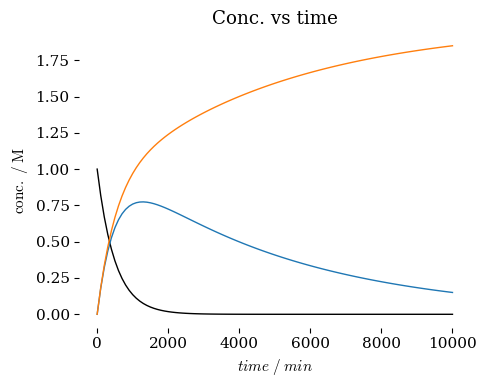

In [53]:
### from StealThisCode/4_SciPy/K05_NumericIntegration_SystemEq.ipynb

#######################
### import packages 
#######################

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

############################################
### Create a function that describes the 
### system of differential equations. 
############################################

def rates(t, c, k_1, k_2):  

    A = c[0]; I = c[1]; P = c[2]           ### assign initial conc. from input list c

    dA_dt = -k_1 * c[0]    ### rates of each reaction step with give concentration in list c
    dI_dt = k_1 * c[0]  - k_2 * c[1] 
    dP_dt = k_1 * c[0] + k_2 * c[1] 

    return [dA_dt, dI_dt, dP_dt]


############################################
### Parameters and experimental conditions
############################################

k_1 = 2e-3          ### Values for kinetic parameters
k_2 = 2e-4
A0_conc = 1
      
time_end = 10000   ### The end time
n_points = 100   ### number of points - increase if needed

#########################################
### Create series of time points      
#########################################

dt = time_end / n_points           ### time step, delta t
t_line = np.arange(0, time_end+dt, dt) ### time vector (list of time points)
num = len(t_line)


#########################################
### Integrate the system of differential equations      
#########################################

initial = [A0_conc, 0, 0]      ### Set list of initial values (A, I, P)

int = solve_ivp(rates,                ### the function being integrated. 
                [0, time_end],        ### start and endpoint of integration
                initial,              ### initial values
                method = "Radau",     ### 'RK45', 'RK23', 'LSODA', 'DOP853', 'Radau', 'BDF'
                t_eval = t_line,      ### time points at which to calculate values
#                first_step = 1e-5,    ### take a very small first step. the initial rate is much faster than the average slope.
                args = [k_1, k_2]  ### values to send to function after t and c
                )

#########################################
### Extract the results from the returned data object      
#########################################

time = int.t        ### solve_inp() returns an array for time indexed as 't'
yarray = int.y      ### Also retruns and array of calculated y values.
                    ###  if more than one value returned from function we will
                    ###  get a array of arrays for each value

##################################################################################
### Plot the results
##################################################################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################
x = time      
y = yarray[0] 
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C0',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = yarray[1]
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C1',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = yarray[2]
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C2',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
#########################################
### Add more style
#########################################
        
ax.set(ylabel=r"$\rm conc.\;/\;M $", 
        xlabel=r"$time\; /\; min$",
        title = "Conc. vs time",
        xlim=[None, None],      
        ylim=[None, None])


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig("plot.pdf")    # use this to save the figure in PDF format
plt.show()                 # output the combined four plots



### Total Absorbance

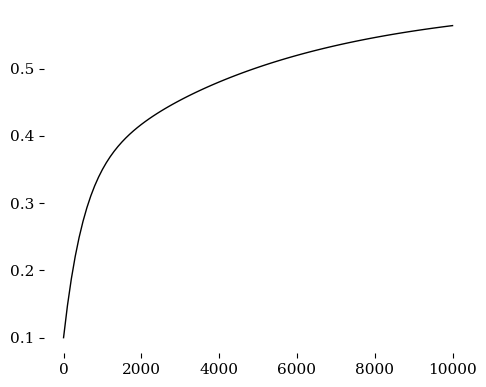

In [54]:
k1_rate = 2e-3
k2_rate = 2.0e-4
Abs0_ = 0.1

e_A_ = 1
e_I_ = 0.6
e_P_ = 3

t_range = [t,0,10000]

##################################################################################
### Plot the results
##################################################################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################
x = time      
y = Abs0_*(yarray[0] + e_I_/e_A_*yarray[1] + e_P_/e_A_*yarray[2])

ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C0',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )


## Make Data

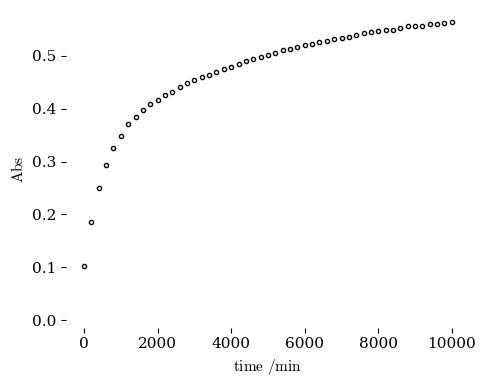

In [55]:
############################################
### Parameters and experimental conditions
############################################

k_1 = 2e-3          ### Values for kinetic parameters
k_2 = 2e-4
A0_conc = 1

Abs0_ = 0.1

e_A_ = 1
e_I_ = 0.6
e_P_ = 3


      
time_end = 10000   ### The end time
n_points = 50   ### number of points - increase if needed

#########################################
### Create series of time points      
#########################################

dt = time_end / n_points           ### time step, delta t
t_line = np.arange(0, time_end+dt, dt) ### time vector (list of time points)
num = len(t_line)


#########################################
### Integrate the system of differential equations      
#########################################

initial = [A0_conc, 0, 0]      ### Set list of initial values (A, I, P)

int = solve_ivp(rates,                ### the function being integrated. 
                [0, time_end],        ### start and endpoint of integration
                initial,              ### initial values
                method = "Radau",     ### 'RK45', 'RK23', 'LSODA', 'DOP853', 'Radau', 'BDF'
                t_eval = t_line,      ### time points at which to calculate values
#                first_step = 1e-5,    ### take a very small first step. the initial rate is much faster than the average slope.
                args = [k_1, k_2]  ### values to send to function after t and c
                )

#########################################
### Extract the results from the returned data object      
#########################################

time = int.t        ### solve_inp() returns an array for time indexed as 't'
yarray = int.y      ### Also retruns and array of calculated y values.
                    ###  if more than one value returned from function we will
                    ###  get a array of arrays for each value

##################################################################################
### Plot the results
##################################################################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################
xd = time      
yd = Abs0_*(yarray[0] + e_I_/e_A_*yarray[1] + e_P_/e_A_*yarray[2])
yr = np.random.normal(yd, .001)   # add random gaussian error 

ax.plot(xd, yr, 
        linestyle = None,            ### use a line between points
        marker = ".",
        linewidth=0,            ### make the line thin
        color = 'C0',            ### the line is black
        markerfacecolor = 'white',
        zorder = 0,                  ### everything is in layer 0 (the bottom layer in this case)
        )

ax.set(ylabel=r"$\rm Abs$", 
       xlabel=r"$\rm time \ /min$",
#       xlim=[-0.025*np.max(x),None],                  
       ylim=[-0.025*np.max(y),None],
      )
plt.show()


## Curve Fit using Numerical Integration

Abs0: 1.00e-01 +/- 2.33e-04
k1: 2.00e-03 +/- 1.32e-05
k2: 1.98e-04 +/- 2.84e-06


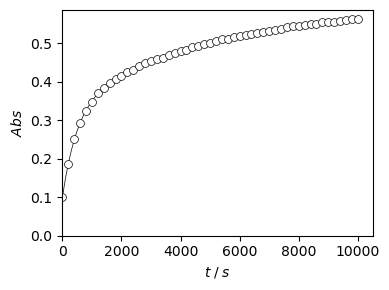

In [56]:
from scipy.optimize import curve_fit

############################################
### Create a function that describes the 
### system of differential equations. 
############################################

def fitfunc(t, Abs0, k_1_, k_2_):
    'Function that returns Total Abs computed from an ODE for a k1, k2 and Abs0'

    def rates(t, c, k_1_, k_2_):  
    
        A = c[0]; I = c[1]; P = c[2]           ### assign initial conc. from input list c
    
        dA_dt = -k_1_ * c[0]    ### rates of each reaction step with give concentration in list c
        dI_dt = k_1_ * c[0]  - k_2_ * c[1] 
        dP_dt = k_1_ * c[0] + k_2_ * c[1] 
    
        return [dA_dt, dI_dt, dP_dt]

    e_A = 1       # Extinction coefficeint ratios
    e_I = 0.6
    e_P = 3
    
    initial = [1, 0, 0]    # Initial conc of A,I,P

    int = solve_ivp(rates, [0,np.max(xd)], 
                   initial, 
                   method="LSODA",   ### 'RK45', 'RK23', 'LSODA', 'DOP853', 'Radau', 'BDF'
                   t_eval=t, 
                   args=[k_1_, k_2_] 
                   )

    yarray = int.y
    y = Abs0*(yarray[0] + e_I/e_A*yarray[1] + e_P/e_A*yarray[2])

    return y

k_fit, pcov = curve_fit(fitfunc, xd, yr, p0 = [0.1,1e-3,1e-3])

perr = np.sqrt(np.diag(pcov))

Abs0, k1, k2 = k_fit
Abs0_stdev, k1_stdev, k2_stdev  = perr

print(f"Abs0: {Abs0:0.2e} +/- {Abs0_stdev:0.2e}")
print(f"k1: {k1:0.2e} +/- {k1_stdev:0.2e}")
print(f"k2: {k2:0.2e} +/- {k2_stdev:0.2e}")

##########################
### plot x and y data
##########################

x = xd      ### The data that was used in the curve fit 
y = yr      ### convert conc from M to mM  

x_fit = np.linspace(0,np.max(xd),100);   ### The line calucltade from the optimized parameters
y_fit = fitfunc(x_fit, Abs0, k1, k2)

plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
#plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  

ax.plot(x_fit, y_fit,
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
ax.scatter(xd, yr, 
        marker='o',                 ### Plot the x and y data 
        color='white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=32,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 2                  ### everything is in layer 1 (the top layer in this case)
        )
ax.set( xlabel= r"$t\;/\;s$", 
        ylabel=r"$Abs$",
  #      title = "MM Reaction",
        xlim=[0, None],                  
        ylim=[0, None]      
       )
#ax.spines[['left','bottom']].set_position(('axes',-0.05))   ### space spines a little away from 'axes' (plot box)


#########################################
### Output the plot
#########################################

fig.tight_layout()         # otherwise the right y-label is slightly clipped

plt.savefig("plotq.pdf")     ### export the plot as this
plt.show() 

51 51


Abs0: 1.02e-01 +/- 8.10e-04
k1: 1.97e-03 +/- 2.41e-05
k2: 1.97e-04 +/- 3.38e-06
rI: 6.02e-01 +/- 9.82e-03
rP: 2.96e+00 +/- 2.37e-02


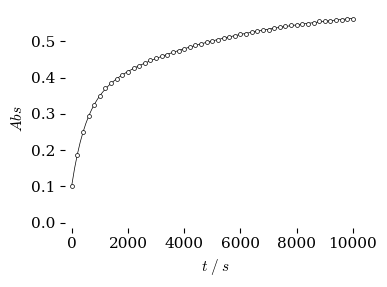

In [57]:
from scipy.optimize import curve_fit

############################################
### Create a function that describes the 
### system of differential equations. 
############################################

def fitfunc(t, Abs0, k_1_, k_2_, r_I, r_P):
    'Function that returns Total Abs computed from an ODE for a k1, k2 and Abs0'

    def rates(t, c, k_1_, k_2_):  
    
        A = c[0]; I = c[1]; P = c[2]           ### assign initial conc. from input list c
    
        dA_dt = -k_1_ * c[0]    ### rates of each reaction step with give concentration in list c
        dI_dt = k_1_ * c[0]  - k_2_ * c[1] 
        dP_dt = k_1_ * c[0] + k_2_ * c[1] 
    
        return [dA_dt, dI_dt, dP_dt]

                 # Extinction coefficeint ratios
    
    initial = [1, 0, 0]    # Initial conc of A,I,P

    int = solve_ivp(rates, [0,np.max(t)], 
                   initial, 
                   method="LSODA",   ### 'RK45', 'RK23', 'LSODA', 'DOP853', 'Radau', 'BDF'
                   t_eval=t, 
                   args=[k_1_, k_2_] 
                   )

    yarray = int.y
    y = Abs0*(yarray[0] + r_I * yarray[1] + r_P * yarray[2])

    return y

# xd=xd[1:]; yr=yr[1:]

print(len(xd), len(yr))
popt, pcov = curve_fit(fitfunc, xd, yr, p0 = [0.1, 1e-3, 1e-4, 1, 2])

popt_un = un.correlated_values(popt, pcov)

[ka, kb, kc, kd, Ka1] = popt_un

perr = np.sqrt(np.diag(pcov))

Abs0, k1, k2, rI, rP = popt
Abs0_stdev, k1_stdev, k2_stdev, rI_stdev, rP_stdev  = perr

print(f"Abs0: {Abs0:0.2e} +/- {Abs0_stdev:0.2e}")
print(f"k1: {k1:0.2e} +/- {k1_stdev:0.2e}")
print(f"k2: {k2:0.2e} +/- {k2_stdev:0.2e}")
print(f"rI: {rI:0.2e} +/- {rI_stdev:0.2e}")
print(f"rP: {rP:0.2e} +/- {rP_stdev:0.2e}")


##########################
### plot x and y data
##########################

x = xd      ### The data that was used in the curve fit 
y = yr      ### convert conc from M to mM  

x_fit = np.linspace(0,np.max(xd),100);   ### The line calucltade from the optimized parameters
y_fit = fitfunc(x_fit, Abs0, k1, k2, rI, rP)

plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  

ax.plot(x_fit, y_fit,
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
ax.scatter(xd, yr, 
        marker='o',                 ### Plot the x and y data 
        facecolors = 'white',              ### markers are this color
        edgecolors = 'black',       ### outline of markers is this color
        linewidths = 0.5,           ### outline of markers is this wide
        s=8,                       ### "s" is "size". sqrt(64) = 8 points wide
        zorder = 2                  ### everything is in layer 1 (the top layer in this case)
        )
ax.set( xlabel= r"$t\;/\;s$", 
        ylabel=r"$Abs$",
  #      title = "MM Reaction",
        xlim=[-0.025*np.max(xd), None],                  
        ylim=[-0.025*np.max(y_fit), None]      
       )
#ax.spines[['left','bottom']].set_position(('axes',-0.05))   ### space spines a little away from 'axes' (plot box)


#########################################
### Output the plot
#########################################

fig.tight_layout()         # otherwise the right y-label is slightly clipped

plt.savefig("plotq.pdf")     ### export the plot as this
plt.show() 

## Curve Fit with Analytical Integration

This will allow for using the uncertainties package.

In [58]:
import sympy as sym
import matplotlib.pyplot as plt


### Construct integrated equation using code from above.

t = sym.symbols('t')     # create t as a 'symbol', not a variable
k1 = sym.symbols('k1')     # create k as a 'symbol'
k2 = sym.symbols('k2')     # create k as a 'symbol'
At = sym.symbols('A_t')  # create At as a 'symbol'
A0 = sym.symbols('A0')   # create A0 as a 'symbol'
It = sym.symbols('I_t')   # create A0 as a 'symbol'

xt = sym.Function('x_t')    # create x as a 'function', not a variable

### Integrate for A(t)
print("AAAAAAAAAAAAAAAAAAAAAAA")

lhs = sym.Derivative(At, t) # Using Derivative function to get differential of A(t) w.r.t. t
                            # could not used At.diff(t) because At is not a function 
rhs = -k1*(At)

diffeq = sym.Eq(lhs, rhs)   # create a sympy equation
diffeq = diffeq.subs({At: (A0 - xt(t))})    # A(t) = A0 - x(t)

A = sym.dsolve(diffeq, ics={xt(0): 0})      # Solve the differential equation. 
                                            # Initial condition is x(t) = 0 when t = 0
rhs = A.rhs; lhs = A.lhs
lhs = lhs.subs({xt(t): (A0 - At)})  # x(t) = A0 - A(t)
A = sym.Eq(lhs,rhs)

rhs = A.rhs; lhs = A.lhs
rhs = -(rhs-A0); lhs = -(lhs-A0)    # Simplify by subtracting A0 from both sides
A = sym.Eq(lhs,rhs)

print("Integrated equation for At")
display(A)

#############################
print("IIIIIIIIIIIIIIIIIIIIIIIIIIIIII")

lhs = sym.Derivative(It, t) # Using Derivative function to get differential of I(t) w.r.t. t
                             
rhs = k1*A.rhs - k2*It    #k1*At - k2*It and substitute in equation A for At

diffeq = sym.Eq(lhs, rhs)   # create a sympy equation
diffeq = diffeq.subs({It: xt(t)})

I = sym.dsolve(diffeq, ics={xt(0): 0})      # Solve the differential equation for I(t). 
                                            # Initial condition is x(t) = 0 when t = 0
rhs = I.rhs; lhs = I.lhs
rhs = sym.collect(rhs,(A0*k1/(k1-k2)))      # collect terms for simpler equation
I = sym.Eq(lhs,rhs)

print("Integrated equation for It")
display(I)

################################
print("PPPPPPPPPPPPPPPPPPPPPP")

Pt = sym.symbols('P_t')   # create Pt as a 'symbol'

rhs = 2*A0 - 2*A.rhs - I.rhs    # Pt = 2A0 - 2At - I
rhs = sym.collect(rhs,A0)

P = sym.Eq(Pt,rhs)
display(P)


################################


At_ = A.rhs      # expressions for concentrations
It_ = I.rhs
Pt_ = P.rhs

e_A = sym.symbols(r'\epsilon_A')   # extinction coefficients
e_I = sym.symbols(r'\epsilon_I') 
e_P = sym.symbols(r'\epsilon_P') 

r_I = sym.symbols(r'r_I')   # ratio of extiction coeff
r_P = sym.symbols(r'r_P') 


Abs_A = e_A * At_   # variables for absotrbances
Abs_I = e_I * It_ 
Abs_P = e_P * Pt_ 
Abs_0 = sym.symbols('Abs_0')
Abs_T = sym.symbols('Abs_T')

Total = Abs_A + Abs_I + Abs_P           # total absorbance
Total = Total.subs(A0, Abs_0/e_A)
print("TotalAbsTotalAbsTotalAbs")
#display(Total)

Total = Total.subs({e_I/e_A: r_I,
                    e_P/e_A: r_P})

Total = sym.Eq(Abs_T,Total)
display(Total)

AAAAAAAAAAAAAAAAAAAAAAA
Integrated equation for At


Eq(A_t, A0*exp(-k1*t))

IIIIIIIIIIIIIIIIIIIIIIIIIIIIII
Integrated equation for It


Eq(x_t(t), A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

PPPPPPPPPPPPPPPPPPPPPP


Eq(P_t, A0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t)))

TotalAbsTotalAbsTotalAbs


Eq(Abs_T, Abs_0*k1*r_I*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + Abs_0*r_P*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t)) + Abs_0*exp(-k1*t))

[[Model]]
    Model(_lambdifygenerated)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 112
    # data points      = 51
    # variables        = 5
    chi-square         = 3.5606e-05
    reduced chi-square = 7.7404e-07
    Akaike info crit   = -712.916260
    Bayesian info crit = -703.257132
    R-squared          = 0.99992805
[[Variables]]
    Abs_0:  0.10158189 +/- 8.1063e-04 (0.80%) (init = 0.1)
    k1:     1.9717e-04 +/- 3.3868e-06 (1.72%) (init = 0.0001)
    k2:     0.00197283 +/- 2.4158e-05 (1.22%) (init = 0.001)
    r_I:    23.6483749 +/- 0.46697998 (1.97%) (init = 3)
    r_P:    2.95722713 +/- 0.02367204 (0.80%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(Abs_0, r_P) = -0.9501
    C(r_I, r_P)   = +0.8152
    C(k1, k2)     = +0.7428
    C(k1, r_I)    = -0.6182
    C(Abs_0, r_I) = -0.6140
    C(Abs_0, k2)  = -0.4721
    C(k2, r_P)    = +0.2656
    C(Abs_0, k1)  = -0.1788
    C(k1, r_P)    = -0.1297


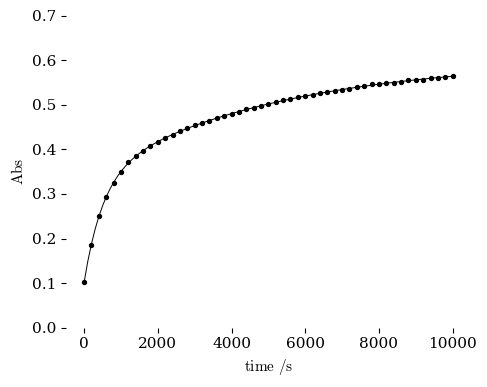

In [59]:
import matplotlib.pyplot as plt
import lmfit     
import uncertainties as un               # tool set for handling uncertainties
from uncertainties import unumpy as unp  # a replacement for numpy 


plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

##########################
### create function 
##########################

f = sym.lambdify([t, Abs_0, k1, k2, r_I, r_P], Total.rhs)   ### create function in terms of t, S0, KM and Vmax

##########################
### use lmfit to fit data to function 
##########################

mod = lmfit.Model(f)                            # load the function f as the model to be fit
pars = mod.make_params(Abs_0 = 0.1,
                       k1 = 0.0001,
                       k2 = 0.001,
                       r_I = 3,
                       r_P = .3)   # state the parameters (use the text strings that we used above in sympy)
                                                # initial values are also set here

result = mod.fit(yr, pars, t=xd)            # use the .fit method on the model object to perform the curve fit
                                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())

Abs_fit = result.uvars['Abs_0']         ### collect parameters as uncertain values
k1_fit = result.uvars['k1']
k2_fit = result.uvars['k2']
r_I_fit = result.uvars['r_I']
r_P_fit = result.uvars['r_P']


########################################################################
########################################################################
########################################################################
########################################################################

#### Create Confidence band upper and lower bounds
sigma = 2

x1 = np.linspace(0, np.max(xd), 100)

bestfit_y1 = f(x1, Abs_fit.n, k1_fit.n, k2_fit.n, r_I_fit.n, r_P_fit.n)

y1 = unp.nominal_values(bestfit_y1)



#########################################
### Plot the data and the line fit.   ###
#########################################
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

ax.plot(x1, y1, color='black', zorder=1, linewidth=0.7)

#ax.scatter(xd,yr, s=32, color="white", zorder=2)
ax.scatter(xd,yr, s=8, color="black", zorder=4)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\rm Abs$", 
       xlabel=r"$\rm time\ /s$",
#          xlim=[0,None],                  
          ylim=[0,0.7]
      
      )

#############################
### Output the final plot ###
#############################

fig.savefig("plot_QQ2_un.pdf")   # use this to save the figure in PDF format

plt.show()



In [60]:
import matplotlib.pyplot as plt
import lmfit     

plt.rcdefaults()

##########################
### create function 
##########################
rhs = Total.rhs

rhs = rhs.subs({r_I: 0.6,
                r_P: 3})

f = sym.lambdify([t, Abs_0, k1, k2], rhs)   ### create function in terms of t, S0, KM and Vmax
fu = un.wrap(f)

##########################
### use lmfit to fit data to function 
##########################

mod = lmfit.Model(f)                            # load the function f as the model to be fit
pars = mod.make_params(Abs_0 = 0.1,
                       k1 = .01,
                       k2 = .005,
                       )   # state the parameters (use the text strings that we used above in sympy)
                                                # initial values are also set here

result = mod.fit(yr, pars, t=xd)            # use the .fit method on the model object to perform the curve fit
                                                # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())




[[Model]]
    Model(_lambdifygenerated)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 51
    # variables        = 3
    chi-square         = 3.8450e-05
    reduced chi-square = 8.0104e-07
    Akaike info crit   = -712.996690
    Bayesian info crit = -707.201213
    R-squared          = 0.99992230
[[Variables]]
    Abs_0:  0.10014012 +/- 2.3313e-04 (0.23%) (init = 0.1)
    k1:     0.00199820 +/- 1.3254e-05 (0.66%) (init = 0.01)
    k2:     1.9770e-04 +/- 2.8458e-06 (1.44%) (init = 0.005)
[[Correlations]] (unreported correlations are < 0.100)
    C(Abs_0, k2) = -0.9914
    C(Abs_0, k1) = -0.8094
    C(k1, k2)    = +0.7729


parameter names: ['Abs_0', 'k1', 'k2', 'eI', 'eP']
independent variables: ['t']
[[Model]]
    Model(f)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 51
    # variables        = 5
    chi-square         = 3.5606e-05
    reduced chi-square = 7.7404e-07
    Akaike info crit   = -712.916260
    Bayesian info crit = -703.257132
    R-squared          = 0.99992805
[[Variables]]
    Abs_0:  0.10158189 +/- 8.1063e-04 (0.80%) (init = 0.1)
    k1:     0.00197283 +/- 2.4158e-05 (1.22%) (init = 0.002)
    k2:     1.9717e-04 +/- 3.3867e-06 (1.72%) (init = 0.0002)
    eI:     0.60183541 +/- 0.00982316 (1.63%) (init = 0.6)
    eP:     2.95722712 +/- 0.02367208 (0.80%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(Abs_0, eP) = -0.9501
    C(k1, k2)    = +0.7428
    C(k1, eI)    = -0.6967
    C(k2, eI)    = -0.5507
    C(Abs_0, k1) = -0.4721
    C(eI, eP)    = +0.2765
    C(k1, eP)    = +0.2656
    C(Abs_0, k2) = -0.17

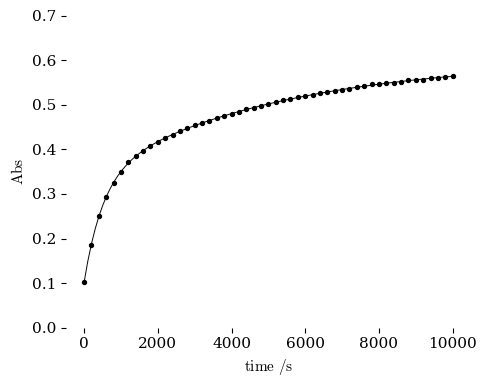

In [72]:
import matplotlib.pyplot as plt
import lmfit     
import uncertainties as un               # tool set for handling uncertainties
from uncertainties import unumpy as unp  # a replacement for numpy 
from scipy.optimize import curve_fit

def f_u(t, Abs_0, k1, k2, eI, eP):

    eA = 1
#    eI = 0.6
#    eP = 3
    
    A0 = Abs_0 / eA
    At = A0 * unp.exp(-k1 * t)
    It = A0 * k1/(k1-k2) * (unp.exp(-k2*t)-unp.exp(-k1*t))
    Pt = A0 * ((2 - 2 * unp.exp(-k1 * t)) - k1/(k1-k2) * (unp.exp(-k2*t)-unp.exp(-k1*t)))
    Total_Abs = At*eA + eI * It + eP * Pt     

    return(Total_Abs)      
    
def f(t, Abs_0, k1, k2, eI, eP):

    eA = 1
#    eI = 0.6
#    eP = 3
    
    A0 = Abs_0 / eA
    At = A0 * np.exp(-k1 * t)
    It = A0 * k1/(k1-k2) * (np.exp(-k2*t)-np.exp(-k1*t))
    Pt = A0 * ((2 - 2 * np.exp(-k1 * t)) - k1/(k1-k2) * (np.exp(-k2*t)-np.exp(-k1*t)))
    Total_Abs = At*eA + eI*It + eP*Pt     

    return(Total_Abs)      

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   


##########################
### use lmfit to fit data to function 
##########################

mod = lmfit.Model(f,
                  nan_policy = 'omit')                            # load the function f as the model to be fit

print(f'parameter names: {mod.param_names}')
print(f'independent variables: {mod.independent_vars}')


pars = mod.make_params(Abs_0 = dict(value = 0.1, min = 1E-10),
                       k1 = dict(value = 0.002, min = 1E-10),
                       k2 = dict(value = 0.0002, min = 1E-10),
                       eI = dict(value = 0.6, min = 1E-10),
                       eP = dict(value = 3, min = 1E-10),
                                  )    # state the parameters (use the text strings that we used above in sympy)
                                    # initial values are also set here

result = mod.fit(yr, pars, t=xd)            # use the .fit method on the model object to perform the curve fit
                                            # the variable in this function is 't' so we must use that in the call
##########################
### get the results 
##########################

print(result.fit_report())

Abs_fit = result.uvars['Abs_0']         ### collect parameters as uncertain values
k1_fit = result.uvars['k1']
k2_fit = result.uvars['k2']
r_I_fit = result.uvars['eI']
r_P_fit = result.uvars['eP']


########################################################################
########################################################################
########################################################################
########################################################################

#### Create Confidence band upper and lower bounds
sigma = 2

x1 = np.linspace(0, np.max(xd), 100)

bestfit_y1 = f_u(x1, Abs_fit, k1_fit, k2_fit, r_I_fit, r_P_fit)

y1 = unp.nominal_values(bestfit_y1)

dev = unp.std_devs(bestfit_y1) * sigma
fit_up = unp.nominal_values(bestfit_y1) + dev
fit_dn = unp.nominal_values(bestfit_y1) - dev


#########################################
### Plot the data and the line fit.   ###
#########################################
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

ax.plot(x1, y1, color='black', zorder=1, linewidth=0.7)

#ax.scatter(xd,yr, s=32, color="white", zorder=2)
ax.scatter(xd,yr, s=8, color="black", zorder=4)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\rm Abs$", 
       xlabel=r"$\rm time\ /s$",
#          xlim=[0,None],                  
          ylim=[0,0.7]
      
      )

ax.fill_between(x1, fit_up, fit_dn, 
                   color="lightgray", alpha=0.4, zorder = 3,
                   linewidth=0, label="confidence interval")

#############################
### Output the final plot ###
#############################

fig.savefig("plot_QQ_un.pdf")   # use this to save the figure in PDF format

plt.show()

(1.015819+/-0.008106)e-01
(1.972834+/-0.024158)e-03
(1.971680+/-0.033867)e-04
(6.018354+/-0.098232)e-01
(2.957227+/-0.023672)e+00


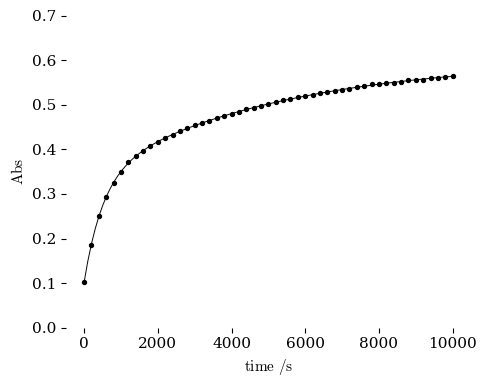

In [76]:
import matplotlib.pyplot as plt
import lmfit     
import uncertainties as un               # tool set for handling uncertainties
from uncertainties import unumpy as unp  # a replacement for numpy 
from scipy.optimize import curve_fit

def fit_u(t, Abs_0, k1, k2, eI, eP):

    eA = 1
#    eI = 0.6
#    eP = 3
    
    A0 = Abs_0 / eA
    At = A0 * unp.exp(-k1 * t)
    It = A0 * k1/(k1-k2) * (unp.exp(-k2*t)-unp.exp(-k1*t))
    Pt = A0 * ((2 - 2 * unp.exp(-k1 * t)) - k1/(k1-k2) * (unp.exp(-k2*t)-unp.exp(-k1*t)))
    Total_Abs = At + eI * It + eP * Pt     

    return(Total_Abs)      
    
def fit(t, Abs_0, k1, k2, eI, eP):

    eA = 1
#    eI = 0.6
#    eP = 3
    
    A0 = Abs_0 / eA
    At = A0 * np.exp(-k1 * t)
    It = A0 * k1/(k1-k2) * (np.exp(-k2*t)-np.exp(-k1*t))
    Pt = A0 * ((2 - 2 * np.exp(-k1 * t)) - k1/(k1-k2) * (np.exp(-k2*t)-np.exp(-k1*t)))
    Total_Abs = At + eI*It + eP*Pt     

    return(Total_Abs)      

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

x = xd
y = yr

#x = xd[7:30]
#y = yd[7:30]

popt, pcov = curve_fit(fit, x, y, 
                   #    bounds=([1.5, 0.0, .1, 7000, 10**(-4.)], [2, 1, .2, 8000, 10**(-3.)]),
                   p0 = [0.1, 0.002,0.0002, 0.6, 3]
                    )

##########################
### get the results 
##########################

popt_un = un.correlated_values(popt, pcov)

[Abs_fit, k1_fit, k2_fit, r_I_fit, r_P_fit] = popt_un

print(f"{Abs_fit:0.6e}")
print(f"{k1_fit:0.6e}")
print(f"{k2_fit:0.6e}")
print(f"{r_I_fit:0.6e}")
print(f"{r_P_fit:0.6e}")


########################################################################
########################################################################
########################################################################
########################################################################

#### Create Confidence band upper and lower bounds
sigma = 2

x1 = np.linspace(0, np.max(xd), 100)

bestfit_y1 = fit_u(x1, Abs_fit, k1_fit, k2_fit, r_I_fit, r_P_fit)

y1 = unp.nominal_values(bestfit_y1)

dev = unp.std_devs(bestfit_y1) * sigma
fit_up = unp.nominal_values(bestfit_y1) + dev
fit_dn = unp.nominal_values(bestfit_y1) - dev


#########################################
### Plot the data and the line fit.   ###
#########################################
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

ax.plot(x1, y1, color='black', zorder=1, linewidth=0.7)

#ax.scatter(xd,yr, s=32, color="white", zorder=2)
ax.scatter(x,y, s=8, color="black", zorder=4)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\rm Abs$", 
       xlabel=r"$\rm time\ /s$",
#          xlim=[0,None],                  
          ylim=[0,0.7]
      
      )

ax.fill_between(x1, fit_up, fit_dn, 
                   color="lightgray", alpha=0.4, zorder = 3,
                   linewidth=0, label="confidence interval")

#############################
### Output the final plot ###
#############################

fig.savefig("plot_QQ_un.pdf")   # use this to save the figure in PDF format

plt.show()

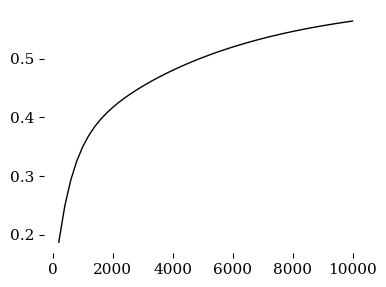

In [ ]:
y1 = fit_u(xd, 0.1, 0.002, 0.0002, 0.6, 3)
plt.plot(xd,y1)